In [174]:
file = 'data/structral/Conflict/train.in'
N = 90

In [175]:
import tools

In [176]:
train_set, nodes, poss_set, neg_set = tools.sample_structural(file, N)

# Get coordinates

In [177]:
from graph_tool.all import *
g = Graph(directed=False)
g.add_vertex(max(nodes) + 1)

<generator object <genexpr> at 0x7fcec0fb1140>

In [178]:
a = 0
for edge in train_set:
    if edge not in poss_set:
        a += 1
        u, w = map(int, edge.split())
        g.add_edge(g.vertex(u), g.vertex(w))
print 1.0 * a / len(train_set)

0.100386100386


In [179]:
pos = sfdp_layout(g)

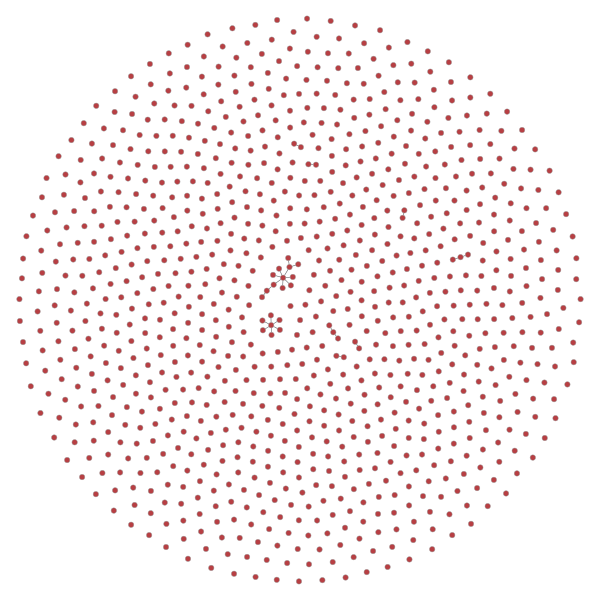

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fcf064ffad0, at 0x7fcec102d6d0>

In [180]:
#%matplotlib inline

graph_draw(g, pos=pos)

In [181]:
from sklearn.metrics import roc_auc_score

In [182]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.dist])
roc_auc_score(Y, X)

0.5336071764077438

In [183]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.preferential_attachment])
roc_auc_score(Y, X)

0.54475123874081299